In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [5]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [157]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [158]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

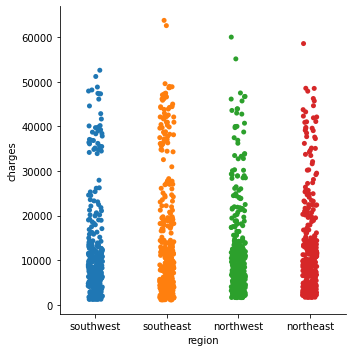

In [159]:
xlabel = df['region']
ylabel = df['charges']

sns.catplot(x="region", y="charges", data=df)

In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


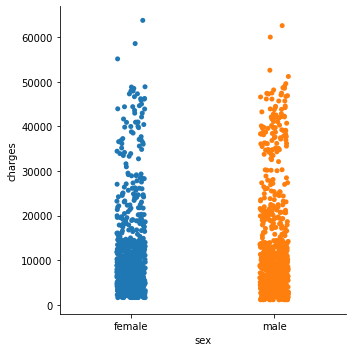

In [161]:
sns.catplot(x="sex", y="charges", data=df)

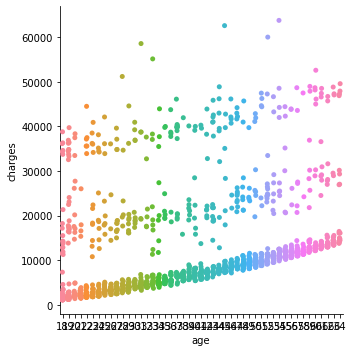

In [162]:
sns.catplot(x="age", y="charges", data=df)

In [163]:
df['children'].unique() #dont know purpose of this column 

array([0, 1, 3, 2, 5, 4], dtype=int64)

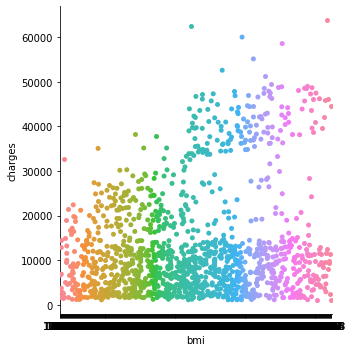

In [164]:

sns.catplot(x='bmi',y='charges', data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

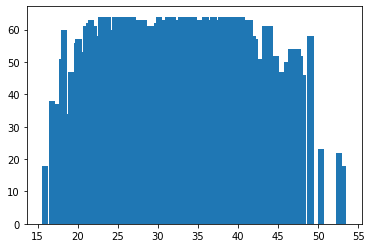

In [8]:
plt.bar(df['bmi'],df['age'])
plt.show

# Data Preprocessing

In [9]:
df.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df['sex']=df.sex.map({'female':0,'male':1})

In [14]:
df['smoker']=df.smoker.map({'yes':0,'no':1})

In [15]:
df['region']=df.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [16]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
5,31,0,25.740,0,1,1,3756.62160
6,46,0,33.440,1,1,1,8240.58960
7,37,0,27.740,3,1,2,7281.50560
8,37,1,29.830,2,1,3,6406.41070
9,60,0,25.840,0,1,2,28923.13692


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# 1: Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

[[19.    0.   27.9   0.  ]
 [18.    1.   33.77  1.  ]
 [28.    1.   33.    1.  ]
 ...
 [18.    0.   36.85  1.  ]
 [21.    0.   25.8   1.  ]
 [61.    0.   29.07  0.  ]]
[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


ValueError: x and y must be the same size

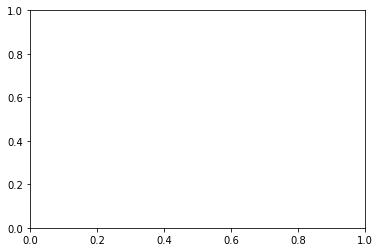

In [21]:
X = df[['age']].values
Y = df[['charges']].values

print(X)
print(Y)
plt.scatter(X,Y, color = 'r')


ValueError: x and y must be the same size

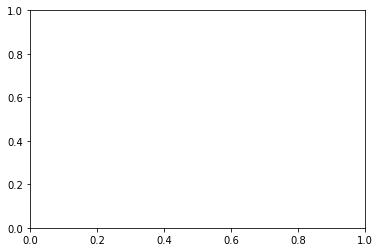

In [22]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)
plt.scatter(X, Y)
plt.show()

In [24]:
print(X.shape)

(5352, 1)


In [25]:
print(Y.shape)

(1338, 1)


In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error



In [ ]:
model = LinearRegression()
model = model.fit(X_train, Y_train)
model

In [132]:
#y_predict = model.predict(Y_test)
#X_predict = model.predict(X_test)
#X_predict
#Y_predict

In [133]:
y_pred = model.predict(X_test)

In [135]:
# performing comparison 
print('- y_pred : ')
print(y_pred)
print('- y_test : ')
print(Y_test)


# Y_test: 9724.53 
# y_pred: 11051.54909755

- y_pred : 
[[11051.54909755]
 [ 9821.28110689]
 [37867.57220923]
 [16125.70579228]
 [ 6920.27132517]
 [ 3879.38549816]
 [ 1448.91928088]
 [14390.17797974]
 [ 9022.95151353]
 [ 7458.83371884]
 [ 4584.60125463]
 [10309.9886336 ]
 [ 8693.03891958]
 [ 4085.25393494]
 [27551.60737718]
 [11151.0640722 ]
 [11243.0536825 ]
 [ 5962.9521121 ]
 [ 8181.9015666 ]
 [26750.7993431 ]
 [33448.59842228]
 [14350.03320383]
 [11672.89478465]
 [32235.7832204 ]
 [ 4326.07702625]
 [ 9096.53607025]
 [ 1045.25196369]
 [10177.76672094]
 [ 4042.60346751]
 [10384.28681219]
 [ 9035.98983755]
 [40123.71002379]
 [15507.20819083]
 [13678.264976  ]
 [24481.97362849]
 [ 5059.21988589]
 [12889.80609711]
 [30333.92625689]
 [33301.25091403]
 [ 3431.35787088]
 [ 3941.81614597]
 [ 4203.90901434]
 [30219.19050725]
 [39245.56885373]
 [27762.83744249]
 [ 4994.74188765]
 [11042.48621304]
 [ 7760.15047885]
 [ 3569.09734756]
 [10613.61535955]
 [ 5544.95921408]
 [ 3397.80923785]
 [32701.67144343]
 [38285.57836702]
 [16290.50463759

In [136]:
print(y_pred.sum().mean())
print(Y_test.sum().mean())

print("So called Accuracy ", y_pred.sum().mean()/Y_test.sum().mean())
#accuracy mean of predicted_values_y/mean of actual_values_y

5267115.253020462
5369815.177479
So called Accuracy  0.9808745885911937


# Mrean Squared Error and R Squared Error

In [149]:
regression_model_mse = mean_squared_error(Y_test,y_pred)
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",model.score(X_test,y_pred))

Mean Squared Error:	 5771.599022962349
R squared value		 1.0


# Result Visualization

Text(0, 0.5, '[[16884.924 ]\n [ 1725.5523]\n [ 4449.462 ]\n ...\n [ 1629.8335]\n [ 2007.945 ]\n [29141.3603]]')

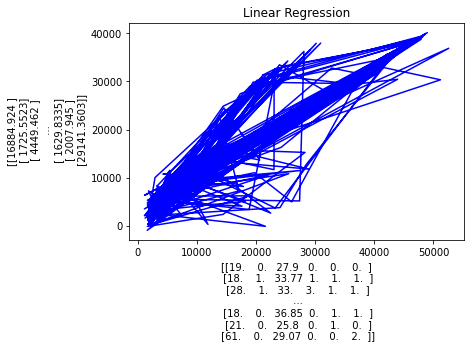

In [144]:

plt.plot(Y_test,y_pred, color= 'blue')
plt.title('Linear Regression')
plt.xlabel(X)
plt.ylabel(Y)

# 2 Polynomial Regression

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, Y_train)

PolynomialFeatures()

In [186]:

Y_train

array([[ 2200.83085],
       [ 5649.715  ],
       [12592.5345 ],
       [ 7419.4779 ],
       [ 5261.46945],
       [ 1744.465  ],
       [36898.73308],
       [13143.86485],
       [ 6781.3542 ],
       [12981.3457 ],
       [ 8556.907  ],
       [12479.70895],
       [48824.45   ],
       [ 3443.064  ],
       [ 7935.29115],
       [16586.49771],
       [14590.63205],
       [ 1532.4697 ],
       [ 6933.24225],
       [ 2217.46915],
       [11856.4115 ],
       [19214.70553],
       [11534.87265],
       [40974.1649 ],
       [ 4889.0368 ],
       [33907.548  ],
       [16776.30405],
       [10982.5013 ],
       [ 8026.6666 ],
       [44501.3982 ],
       [ 8280.6227 ],
       [ 3736.4647 ],
       [ 9058.7303 ],
       [18767.7377 ],
       [36197.699  ],
       [19107.7796 ],
       [25656.57526],
       [39125.33225],
       [ 3906.127  ],
       [17085.2676 ],
       [ 3021.80915],
       [36397.576  ],
       [ 4449.462  ],
       [11396.9002 ],
       [ 1622.1885 ],
       [41

In [179]:
model = LinearRegression()
model.fit(X_poly,Y_train)

LinearRegression()

In [181]:
model2 = LinearRegression()
model2.fit(X_train,Y_train)

LinearRegression()

ValueError: x and y must be the same size

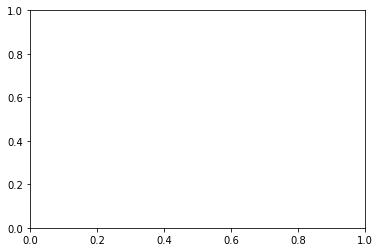

In [191]:
plt.scatter(X,Y, color = 'orange')
plt.show()
plt.plot(X,model.predict(poly.fit_transform(X)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel(X)
plt.ylabel(y)

#x and y must be the same size. why this error, when both are in arrays?

In [193]:
print('Prediction by the model:\t', model.predict(poly.fit_transform(X_test)))
print("So called Accuracy ", model.predict(poly.fit_transform(Y_test)).sum().mean()/Y_test.sum().mean())

Prediction by the model:	 [[ 9.47884375e+03]
 [ 1.01039688e+04]
 [ 4.97056250e+04]
 [ 1.88266875e+04]
 [ 6.13421875e+03]
 [ 3.25112500e+03]
 [ 1.19521875e+03]
 [ 1.61455000e+04]
 [ 1.07329062e+04]
 [ 7.95406250e+03]
 [ 5.85759375e+03]
 [ 1.19720312e+04]
 [ 7.70868750e+03]
 [ 5.52603125e+03]
 [ 2.79631562e+04]
 [ 1.43234688e+04]
 [ 1.49238750e+04]
 [ 4.75506250e+03]
 [ 8.35990625e+03]
 [ 3.11800000e+04]
 [ 2.53670312e+04]
 [ 1.64637188e+04]
 [ 9.16912500e+03]
 [ 2.87755000e+04]
 [ 4.19859375e+03]
 [ 5.91284375e+03]
 [-1.67618750e+03]
 [ 1.07604688e+04]
 [ 5.43634375e+03]
 [ 1.07360625e+04]
 [ 1.11496875e+04]
 [ 5.29169375e+04]
 [ 1.47780938e+04]
 [ 1.06317500e+04]
 [ 1.18047188e+04]
 [ 1.79921875e+03]
 [ 9.12753125e+03]
 [ 3.37248750e+04]
 [ 3.68305312e+04]
 [ 3.81934375e+03]
 [-2.06250000e+00]
 [ 5.50237500e+03]
 [ 2.46163125e+04]
 [ 4.88622500e+04]
 [ 4.03893750e+04]
 [ 6.26665625e+03]
 [ 1.42930312e+04]
 [ 8.35650000e+03]
 [ 1.72103125e+03]
 [ 1.33074375e+04]
 [ 2.02143750e+03]
 [ 8.

ValueError: X has 3 features, but LinearRegression is expecting 28 features as input.